<a href="https://colab.research.google.com/github/Davidossec/Proyectosda/blob/main/EDA_Vivienda_RM_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis del precio de la vivienda en la R.M. en el 2020(Portal inmobiliario)  

Realizaremos un análisis exploratorio de datos del

Primero instalaremos algunos paquetes que utilizaremos

In [1]:
!pip install pillow
!pip install fancyimpute

In [2]:
import math
from math import ceil
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import PIL
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import warnings
from fancyimpute import IterativeImputer
warnings.filterwarnings('ignore')

In [3]:
def print_bold_italic(text):
    bold = "\033[1m" #Texto en cursiva
    italic = "\033[3m" #Texto en negrita
    reset = "\033[0m" #Reiniciar formato
    print(f"{bold}{italic}{text}{reset}")
print_bold_italic('Crearemos una función para tener un texto ligeramente estilizado😊')

Crearemos una función para tener un texto ligeramente estilizado😊


In [4]:
print_bold_italic('¡Cargaremos a este gatito! 😺 \nRazón: Es elegante y bonito.')

image = Image.open('/content/drive/MyDrive/Proyectos/Análisis viviendas usadas RM 2020/Gato elegante.png')
fig = px.imshow(image, title='Probando Plotly Express con este gato elegante')
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

¡Cargaremos a este gatito! 😺 
Razón: Es elegante y bonito.


Continuemos...

In [5]:
#Cargaremos el dataset en un dataframe de pandas
df = pd.read_excel('/content/drive/MyDrive/Proyectos/Análisis viviendas usadas RM 2020/Casas usadas - RM Mayo 2020.xlsx')
print_bold_italic('¡Dataframe creado!📦')

¡Dataframe creado!📦


In [6]:
#Haremos una copia del Dataframe para modificarlo libremente más adelante
original_df = df.copy()
print_bold_italic('¡Copia realizada!')

¡Copia realizada!


#Primer contacto con el dataset
Veremos algunos registros y los tipos de datos

In [7]:
print_bold_italic('¡Mostremos lo que hay en el dataframe😎!')
display(df.head(10))

¡Mostremos lo que hay en el dataframe😎!


,Comuna,Link,Tipo_Vivienda,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Valor_CLP,Dirección,Quién_Vende,Corredor
0,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,6.0,3,5000.0,440,12200.0,351360000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
1,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,6.0,6,5000.0,430,13000.0,374400000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
2,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027.0,140,10300.0,296640000,"Calera de Tango, Avenida calera de tango con...",Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
3,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,6.0,No,5000.0,480,21500.0,619200000,"Calera de Tango, Paradero 14 1/2/5 kilometros ...",RED Gestión Propiedades,Red Gestión Propiedades
4,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,3,5000.0,196,9100.0,262080000,"Calera de Tango, Condominio El Trébol de Caler...",Gabriela Mellado V.,Zenpro Propiedades
5,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,No,5000.0,170,11800.0,339840000,"Calera de Tango, Lonquen Sur/Calera de Tango",Mauricio Pino Propiedades,Mauricio Pino Propiedades
6,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,4,2600.0,140,9850.0,283680000,"Calera de Tango, Graciela Letelier de Ibañez N...",María Teresa Olea González,Vende Dueño/a
7,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,No,5000.0,650,14450.0,416160000,"Calera de Tango, Camino loreto/condominio sant...",Pro Partners Propiedades,Pro Partners Propiedades
8,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,3.0,No,5000.0,404,16500.0,475200000,"Calera de Tango, Lonquen/Calera de tango",Mauricio Pino Propiedades,Mauricio Pino Propiedades
9,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,4.0,No,5015.0,440,16650.0,479520000,"Calera de Tango, Condominio Los Almendros Sur/...",Cristian Vial Propiedades,Cristian Vial Propiedades


In [8]:
print_bold_italic('¡Veamos las dimensiones del dataframe!')
print('N° de filas: ', df.shape[0])
print('N° de columnas: ', df.shape[1])

¡Veamos las dimensiones del dataframe!
N° de filas:  1139
N° de columnas:  13


In [9]:
print_bold_italic('¿Qué tipo de datos tenemos en el dataframe?')
df.info()

¿Qué tipo de datos tenemos en el dataframe?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1131 non-null   float64
 4   N_Baños                   1118 non-null   float64
 5   N_Estacionamientos        1067 non-null   object 
 6   Total_Superficie_M2       1102 non-null   float64
 7   Superficie_Construida_M2  1103 non-null   object 
 8   Valor_UF                  1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Dirección                 1102 non-null   object 
 11  Quién_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(4), int6

In [10]:
print_bold_italic('👀Veamos los estadísticos descriptivos de las variables numéricas🧮')
round(df.describe(),2) #redondear a 2 decimales para facilitar la legibilidad

👀Veamos los estadísticos descriptivos de las variables numéricas🧮


,N_Habitaciones,N_Baños,Total_Superficie_M2,Valor_UF,Valor_CLP
count,1131.00,1118.00,1102.00,1139.00,1.139000e+03
mean,4.11,2.65,866.10,10218.02,2.942870e+08
std,1.60,1.39,1845.36,9652.73,2.779984e+08
min,1.00,1.00,0.00,1215.19,3.500000e+07
25%,3.00,2.00,180.00,3541.42,1.020000e+08
50%,4.00,2.00,293.00,6700.00,1.929600e+08
75%,5.00,3.00,563.75,13510.00,3.890880e+08
max,19.00,12.00,30000.00,70828.41,2.040000e+09


In [11]:
print_bold_italic('¿Cuánto valores únicos hay en cada campo(o columna)?')
df.nunique().sort_values() #Ordenando los valores de forma ascendente

¿Cuánto valores únicos hay en cada campo(o columna)?


,0
Tipo_Vivienda,1
N_Estacionamientos,10
N_Baños,11
N_Habitaciones,14
Comuna,41
Corredor,133
Superficie_Construida_M2,295
Quién_Vende,303
Total_Superficie_M2,464
Valor_CLP,558


#Análisis de valores faltantes y duplicados

In [12]:
print_bold_italic('¿Poseemos valores faltantes en este dataframe?🤔')
def check_missing_values(df):
  if df.isna().sum().sum() == 0:
    print_bold_italic('\n🟢No existen valores faltantes')
  else:
    print_bold_italic(f'\n🔴Existen valores faltantes \n\n🧮Estas columnas poseen valores faltantes:')
    print(df.isna().sum())
check_missing_values(df)

¿Poseemos valores faltantes en este dataframe?🤔

🔴Existen valores faltantes 

🧮Estas columnas poseen valores faltantes:
Comuna                       0
Link                         0
Tipo_Vivienda                0
N_Habitaciones               8
N_Baños                     21
N_Estacionamientos          72
Total_Superficie_M2         37
Superficie_Construida_M2    36
Valor_UF                     0
Valor_CLP                    0
Dirección                   37
Quién_Vende                  0
Corredor                     0
dtype: int64


In [13]:
print_bold_italic('Busquemos si hay datos duplicados')
def check_duplicated(df):
    if df.duplicated().any():
        print_bold_italic('🔴Existen datos duplicados')
        print(df[df.duplicated(keep=False)])
    else:
        print_bold_italic('🟢No existen datos duplicados')
check_duplicated(df)

Busquemos si hay datos duplicados
🟢No existen datos duplicados


In [14]:
print_bold_italic('Miremos a fondo los valores faltantes')
df[df.isna().any(axis=1)]

Miremos a fondo los valores faltantes


,Comuna,Link,Tipo_Vivienda,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Valor_CLP,Dirección,Quién_Vende,Corredor
18,Cerrillos,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,2.0,NaN,134.0,149,3645.580168,105000000,"Cerrillos, General José Bernales Ramírez",Work Inmobiliario,Vende Dueño/a
20,Cerrillos,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,108.0,216,2847.024512,82000000,NaN,Daniela Parrau Vargas,Vende Dueño/a
22,Cerrillos,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,264.0,89,3367.821679,97000000,NaN,Daniela Parrau Vargas,Vende Dueño/a
30,Cerro Navia,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,2.0,1,NaN,198,3298.382057,95000000,"Cerro Navia, Huelen 1581",Monica Edith Vega Riquelme,Vende Dueño/a
38,Colina,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,3.0,2,5400.0,150,6500.000000,187200000,NaN,Gescor Propiedades,Gescor Propiedades
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,Santiago,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,1.0,NaN,376.0,100,7117.561280,205000000,"Santiago, Goycolea",Francisca Abarca,Francisca Abarca
1097,Vitacura,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,NaN,No,524.0,214,28490.000000,820512000,"Vitacura, Clínica Alemana",Cata Brochet Propiedades,Cata Brochet Propiedades
1099,Vitacura,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,3.0,2,200.0,160,20500.000000,590400000,NaN,Sandra Vargas Céspedes,Alianza Pro Gestión Inmobiliaria
1103,Vitacura,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,NaN,No,282.0,140,14500.000000,417600000,"Vitacura, Hualtatas/Alderete",Vivaqui Propiedades,Vivaqui Propiedades


Utilicemos Missigno para visualizar algunos de los registros faltantes


<Axes: >

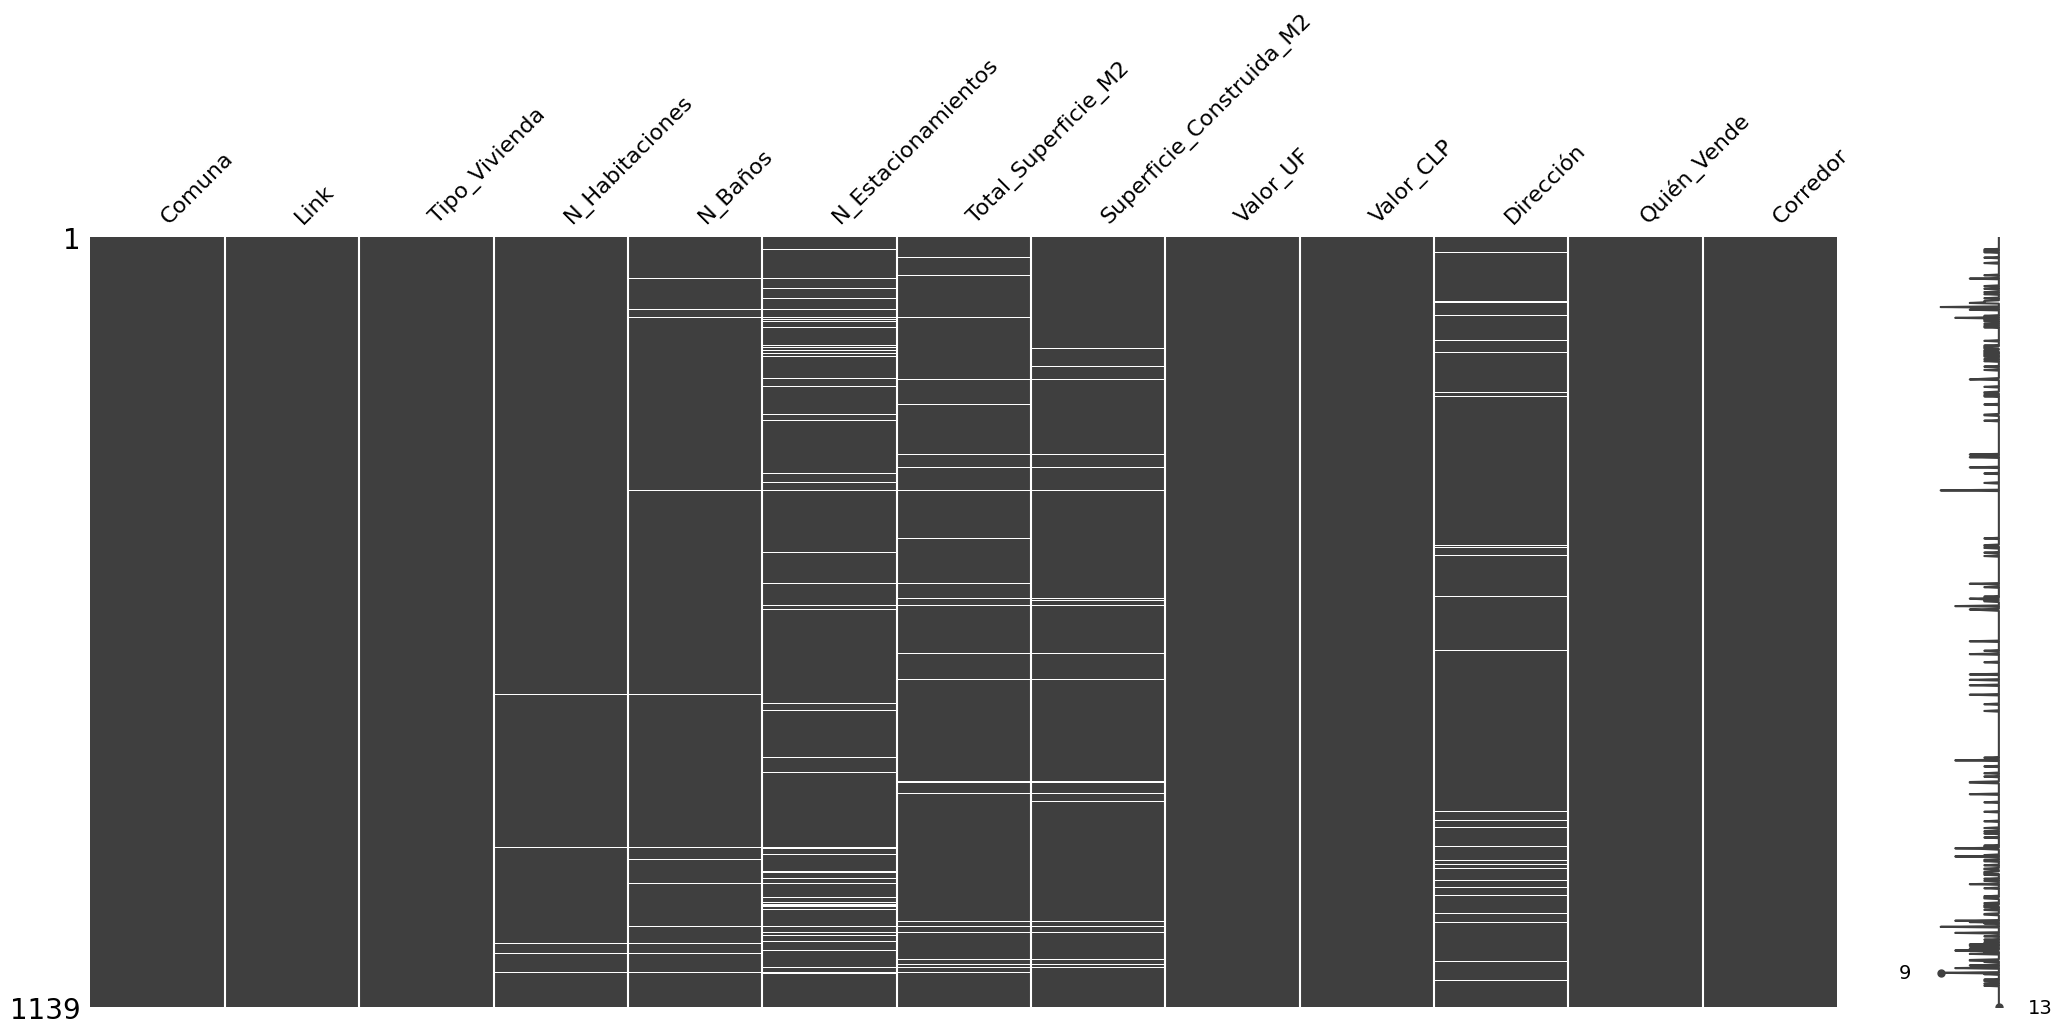

In [15]:
print_bold_italic('Utilicemos Missigno para visualizar algunos de los registros faltantes')
msno.matrix(df)

Hagamos un gráfico de barras para ver el número de registros que existen en el dataset


<Axes: >

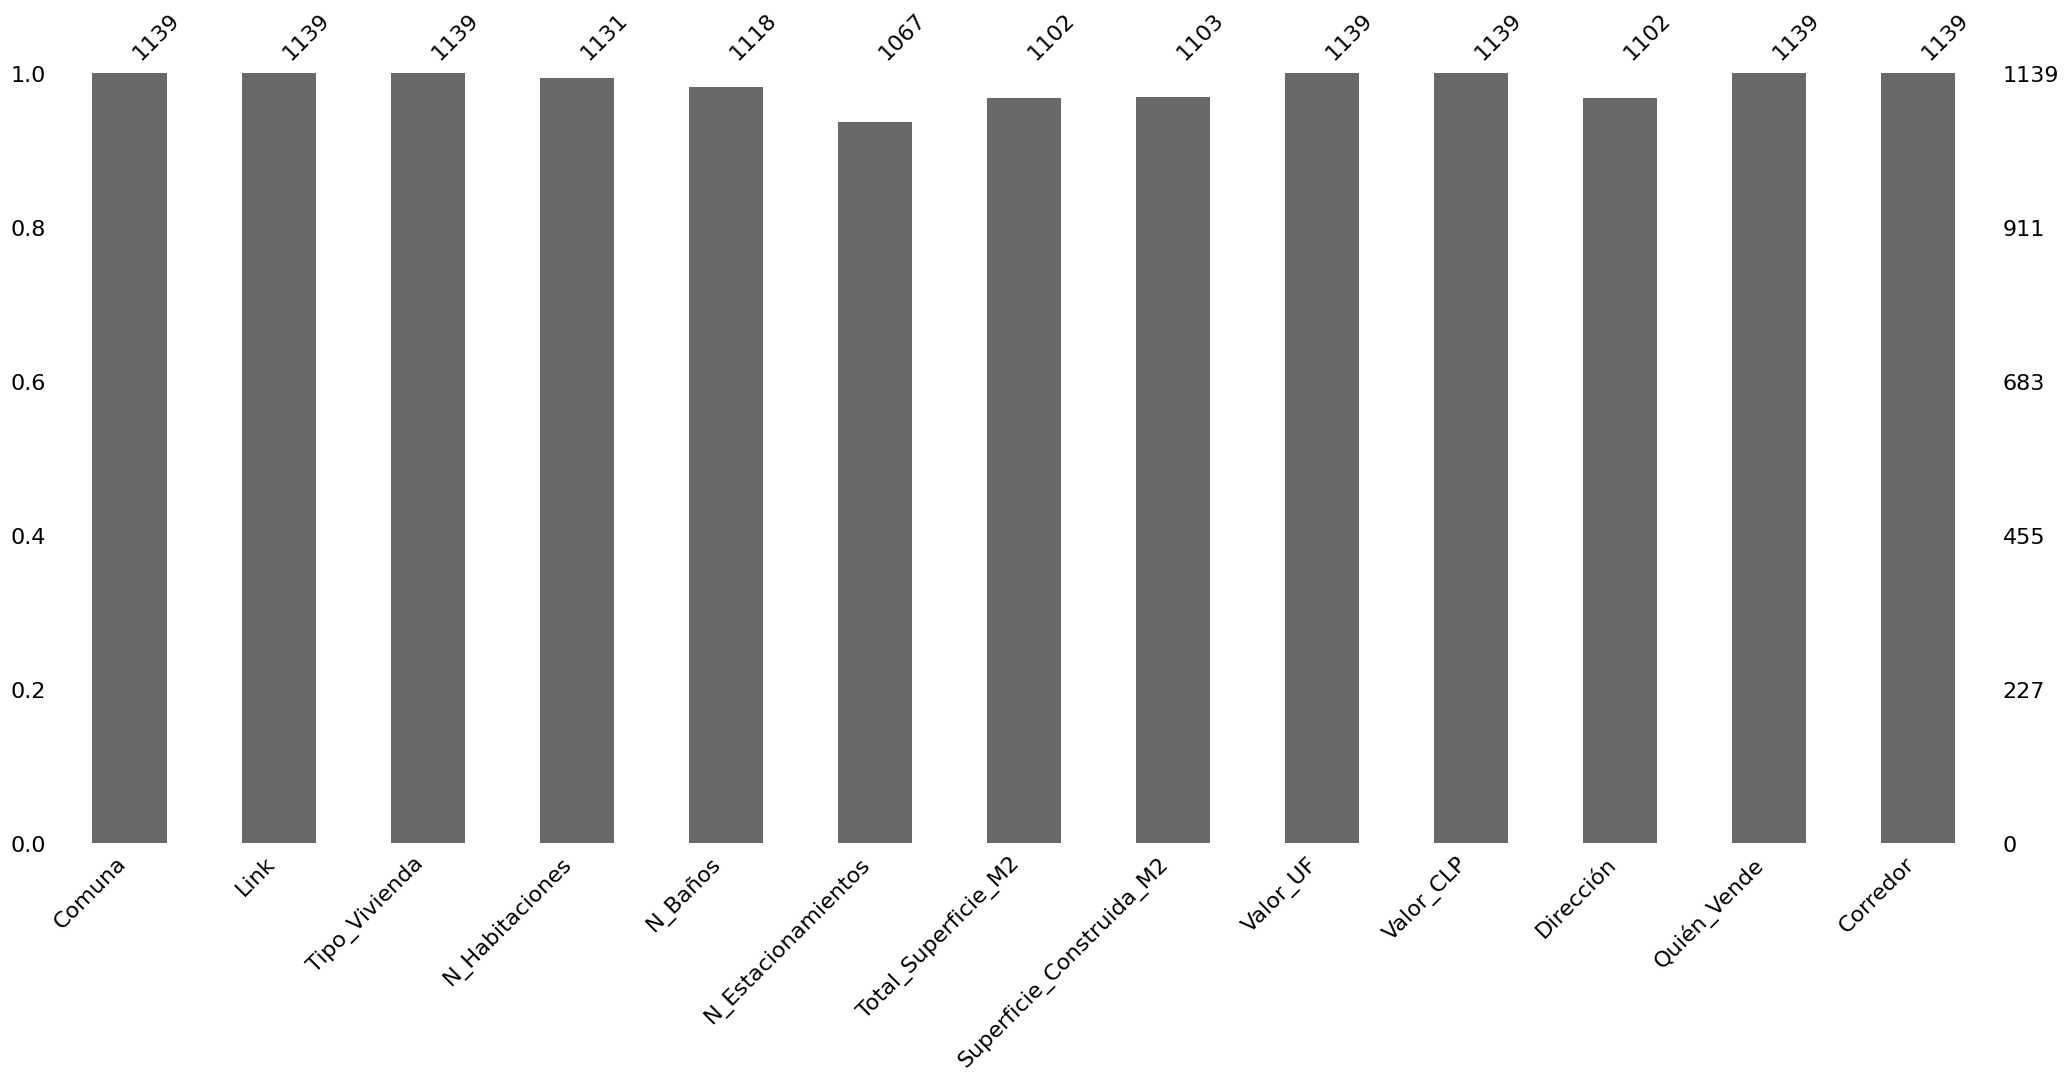

In [16]:
print_bold_italic('Hagamos un gráfico de barras para ver el número de registros que existen en el dataset')
msno.bar(df)

¿Qué correlación hay entre los registros faltantes?


<Axes: >

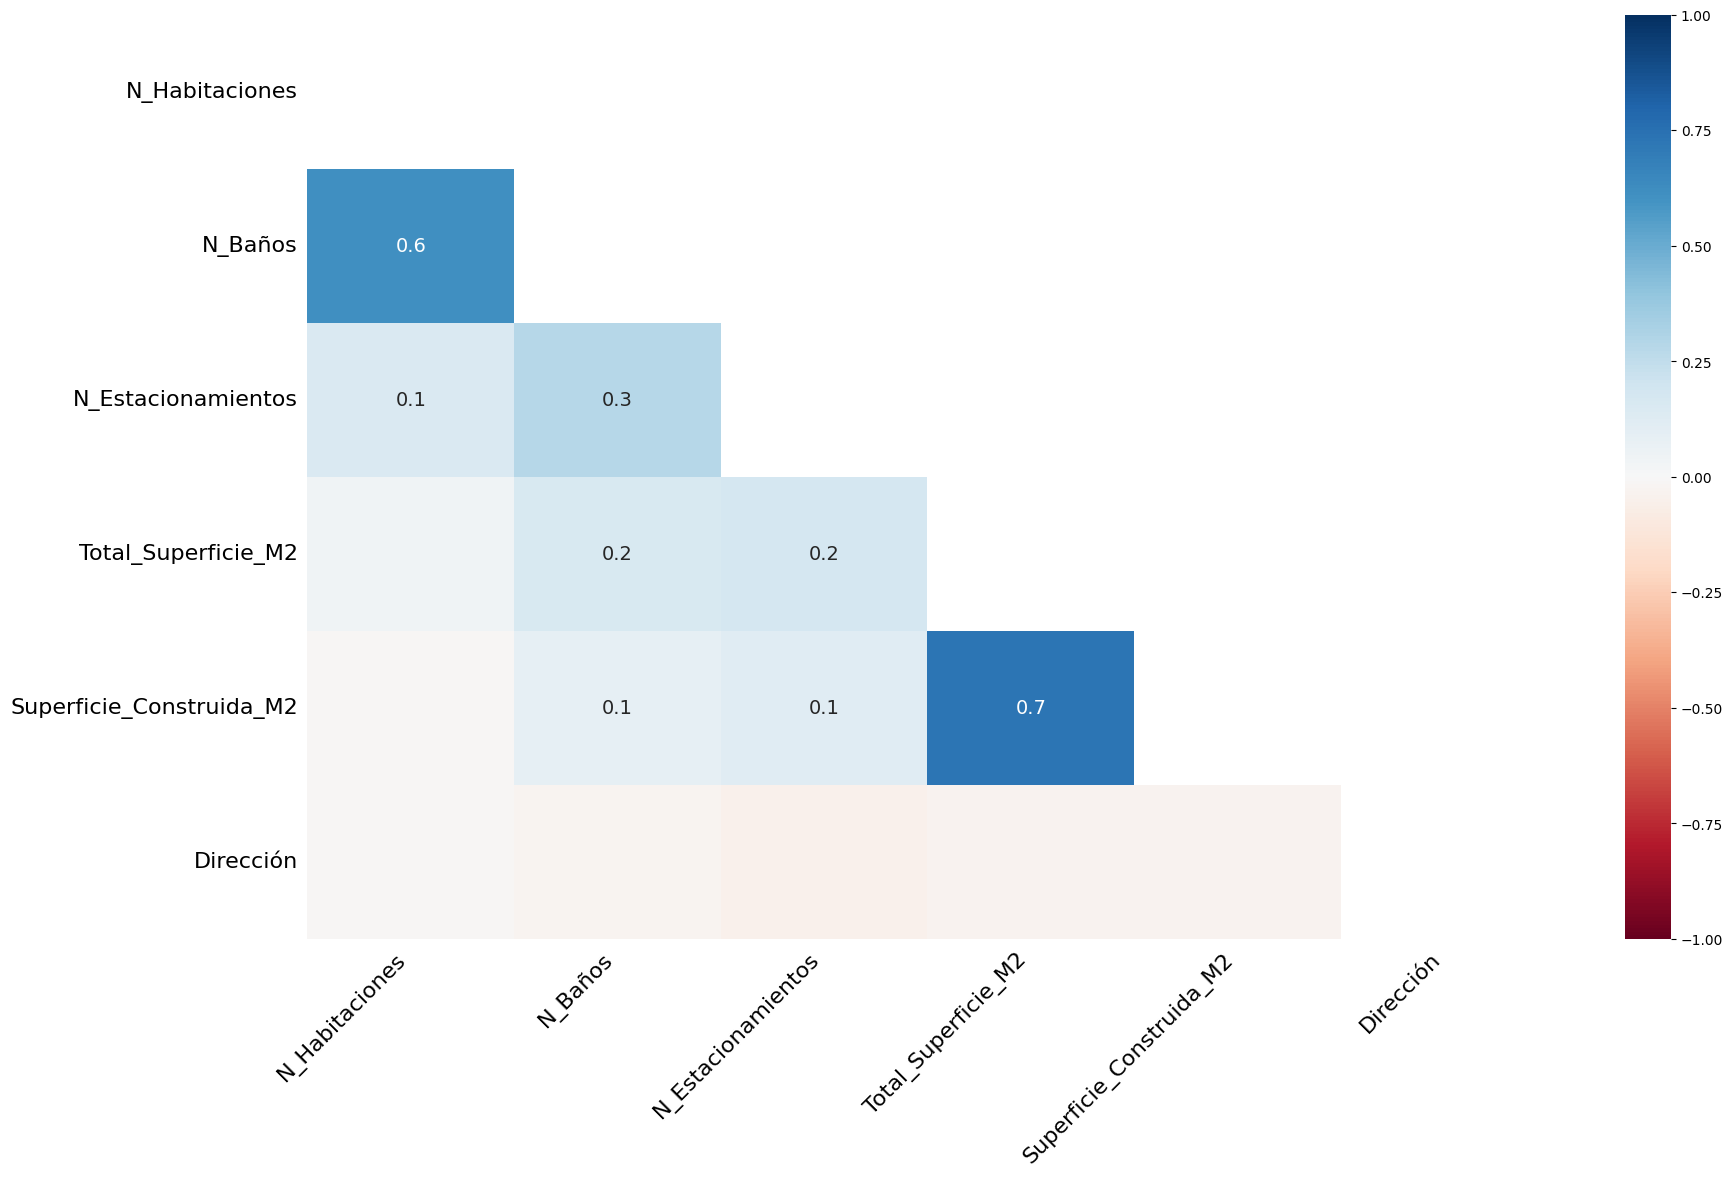

In [17]:
print_bold_italic('¿Qué correlación hay entre los registros faltantes?')
msno.heatmap(df)

Cosas a tener en cuenta:
- Tanto N_Estacionamiento como Superficie_Contruida_M2 son de tipo object, estos deberían ser de tipo númerico(int)

In [18]:
#Indagaremos si los campos poseen valores tipo texto y si los tienen, mostrar esos registros
def contains_non_numeric(df, column_name):
    non_numeric = df[df[column_name].astype(str).str.contains(r'\D')] #filtro de valores no numéricos
    if not non_numeric.empty:
        print_bold_italic("La columna contiene texto o valores no numéricos.")
        print_bold_italic(f"Número de registros no numéricos: {len(non_numeric)}")
        display(non_numeric)
    else:
        print_bold_italic("La columna es completamente numérica.")

In [19]:
contains_non_numeric(df, 'Superficie_Construida_M2')

La columna contiene texto o valores no numéricos.
Número de registros no numéricos: 48


,Comuna,Link,Tipo_Vivienda,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Valor_CLP,Dirección,Quién_Vende,Corredor
62,Colina,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,1,166.0,82.73,1996.389140,57500000,"Colina, Las Nieves.",Colina Propiedades,Colina Propiedades
92,Conchalí,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,2.0,No,180.0,134.95,4513.575446,130000000,"Conchalí, Casa esquina en Avenida / 180 m2 / 4...",Vip Gestión inmobiliaria,Vip Gestion Inmobiliaria
94,Conchalí,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,NaN,266.5,131.6,4860.773557,140000000,"Conchalí, Pasaje Maipo 1484",Paola Sepúlveda,Psp Propiedades
103,El Bosque,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,NaN,NaN,NaN,NaN,3471.981112,100000000,"El Bosque, Casa 220 m2, amplios espacios",Cima Propiedades,Cima Propiedades
164,Independencia,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,2.0,3,130.0,NaN,4513.228248,129990000,"Independencia, Longitudinal seis 585",Montt Propiedades ltda,Montt Propiedades ltda
183,La Cisterna,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,1,67.0,NaN,4687.174502,135000000,"La Cisterna, Ossa / pasaje los juncos",MARCO ANTONIO MORELLI RODRIGUEZ,Marco Morelli
191,La Cisterna,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,1.0,1,72.0,NaN,2603.985834,75000000,"La Cisterna, La Cisterna",Karelys Rojas Clemente,Vende Dueño/a
210,La Florida,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,1,NaN,NaN,2812.304701,81000000,"La Florida, El tronco",Francisco Lopez,Vivienda Integral
321,Lampa,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,2.0,1.0,1,NaN,NaN,1909.589612,55000000,"Lampa, Eleuterio Ramírez",Gestión Inmobiliaria Legal,Gestión Inmobiliaria & Legal
325,Lampa,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,1.0,1,NaN,NaN,2777.237692,79990000,"Lampa, El párroco fernandez 640",Montt Propiedades ltda,Montt Propiedades ltda


In [20]:
contains_non_numeric(df, 'N_Estacionamientos')

La columna contiene texto o valores no numéricos.
Número de registros no numéricos: 672


,Comuna,Link,Tipo_Vivienda,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Valor_CLP,Dirección,Quién_Vende,Corredor
2,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027.0,140,10300.0,296640000,"Calera de Tango, Avenida calera de tango con...",Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
3,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,6.0,No,5000.0,480,21500.0,619200000,"Calera de Tango, Paradero 14 1/2/5 kilometros ...",RED Gestión Propiedades,Red Gestión Propiedades
5,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,No,5000.0,170,11800.0,339840000,"Calera de Tango, Lonquen Sur/Calera de Tango",Mauricio Pino Propiedades,Mauricio Pino Propiedades
7,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,No,5000.0,650,14450.0,416160000,"Calera de Tango, Camino loreto/condominio sant...",Pro Partners Propiedades,Pro Partners Propiedades
8,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,3.0,No,5000.0,404,16500.0,475200000,"Calera de Tango, Lonquen/Calera de tango",Mauricio Pino Propiedades,Mauricio Pino Propiedades
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,Vitacura,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,3.0,No,389.0,211,20000.0,576000000,"Vitacura, Ibiza Candelaria Goyenechea",Vivaqui Propiedades,Vivaqui Propiedades
1135,Vitacura,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,No,325.0,120,22000.0,633600000,"Vitacura, Islas Galapagos/Vitacura",Francisco Vial Propiedades,Francisco Vial Propiedades
1136,Vitacura,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,3.0,No,638.0,242,19900.0,573120000,"Vitacura, Vitacura/Filomena Comas",RED Gestión Propiedades,Red Gestión Propiedades
1137,Vitacura,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,3.0,No,338.0,230,18500.0,532800000,"Vitacura, Lo Arcaya/Av. Vitacura",RED Gestión Propiedades,Red Gestión Propiedades


#Limpieza e imputación de valores faltantes y duplicados

Ahora que hemos identificado los datos que nos impiden convertir las columnas a su tipo correcto. Vamos a empezar a manejar los registros
- "170 ha" en Superfice construida
- "No" en N_Estacionamientos


Modificaremos los registros en las columnas antes mencionadas

In [21]:
check_duplicated(df)
print_bold_italic('Si bien no existen duplicados, se dejará el código que permite eliminarlos comentado')
#df.drop_duplicates(keep='first', inplace=True)

🟢No existen datos duplicados
Si bien no existen duplicados, se dejará el código que permite eliminarlos comentado


In [22]:
df['N_Estacionamientos'].replace('No', 0, inplace=True) #Lo cambiaremos por 0
df['Superficie_Construida_M2'].replace('170 ha', 170, inplace=True) #Lo cambiaremos por 170 ha por 170
print_bold_italic('🔋¡Cambio Realizado!')

🔋¡Cambio Realizado!


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1131 non-null   float64
 4   N_Baños                   1118 non-null   float64
 5   N_Estacionamientos        1067 non-null   float64
 6   Total_Superficie_M2       1102 non-null   float64
 7   Superficie_Construida_M2  1103 non-null   float64
 8   Valor_UF                  1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Dirección                 1102 non-null   object 
 11  Quién_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 115.8+ KB


Debemos estandarizar los registros de las columnas, imputando los valores faltantes y cambiando al tipo de dato correspondiente.

##Imputación de valores faltantes

La imputación de valores siempre es un tema. En esta ocasión, importaré la librería fancy impute para facilitar el manejo de valores faltantes.

In [24]:
columns_to_impute = ['N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2']

# Realizamos la imputación de las columnas a través de una regresión con Iterative imputer
imputer = IterativeImputer()
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
df[columns_to_impute] = df[columns_to_impute].round().astype(int).clip(lower=0) #Dejamos la columna en números enteros y convertimos los negativos en 0

print_bold_italic('Completado!')
check_missing_values(df)

Completado!

🔴Existen valores faltantes 

🧮Estas columnas poseen valores faltantes:
Comuna                       0
Link                         0
Tipo_Vivienda                0
N_Habitaciones               0
N_Baños                      0
N_Estacionamientos           0
Total_Superficie_M2          0
Superficie_Construida_M2     0
Valor_UF                     0
Valor_CLP                    0
Dirección                   37
Quién_Vende                  0
Corredor                     0
dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1139 non-null   int64  
 4   N_Baños                   1139 non-null   int64  
 5   N_Estacionamientos        1139 non-null   int64  
 6   Total_Superficie_M2       1139 non-null   int64  
 7   Superficie_Construida_M2  1139 non-null   int64  
 8   Valor_UF                  1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Dirección                 1102 non-null   object 
 11  Quién_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 115.8+ KB


In [26]:
#Ahora pondremos la comuna como dirección en los registros faltantes de Dirección
df['Dirección'].fillna(df['Comuna'], inplace=True)
print_bold_italic('Completado!')

Completado!


In [27]:
check_missing_values(df)


🟢No existen valores faltantes


#Preguntas a responder

Ahora que no existe valores faltantes, analizaremos los datos.
 Hagamos un par de preguntas
- ¿Qué distribuciones poseen los datos para las variables numéricas?
- ¿Cuáles son las comunas y corredores con la mayor cantidad de viviendas publicadas?

Aventuremonos un poco.

- ¿Cuál es la correlación entre las variables?
- ¿Cuál es la probabilidad de que una casa valga entre 5000 UF y 12000 UF?
- En promedio. ¿Cuáles son las comunas con viviendas más caras?¿Cuáles son los corredores con las viviendas más caras?
- ¿Cuáles son las comunas con el metro
 de superficie cuadrada más cara?
- Haz un wordmap de la variable dirección.

#Selección de variables
Lo primero que haremos, es eliminar las variables que nos aportar menos información


In [28]:
df2 = df.copy() #Hacemos una copia antes de modificar
print_bold_italic('¡Dataframe copiado!')
df2 = df2.drop(columns=['Link', 'Tipo_Vivienda', 'Quién_Vende', 'Valor_CLP', 'Dirección'], axis=1) #eliminamos variables
print_bold_italic('¡Columnas Eliminadas!')
display(df2)

¡Dataframe copiado!
¡Columnas Eliminadas!


,Comuna,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Corredor
0,Calera de Tango,5,6,3,5000,440,12200.0,Zenpro Propiedades
1,Calera de Tango,6,6,6,5000,430,13000.0,Zenpro Propiedades
2,Calera de Tango,3,3,0,2027,140,10300.0,Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
3,Calera de Tango,8,6,0,5000,480,21500.0,Red Gestión Propiedades
4,Calera de Tango,3,2,3,5000,196,9100.0,Zenpro Propiedades
...,...,...,...,...,...,...,...,...
1134,Vitacura,4,3,0,389,211,20000.0,Vivaqui Propiedades
1135,Vitacura,3,2,0,325,120,22000.0,Francisco Vial Propiedades
1136,Vitacura,6,3,0,638,242,19900.0,Red Gestión Propiedades
1137,Vitacura,5,3,0,338,230,18500.0,Red Gestión Propiedades


Ahora que tenemos el dataframe limpio veamos cómo ha cambiado a través de esta limpieza.

In [29]:
print_bold_italic(f'Dimensión del Dataset original --> {original_df.shape}')
print_bold_italic(f'Dimensión del Dataset a analizar --> {df2.shape}')

Dimensión del Dataset original --> (1139, 13)
Dimensión del Dataset a analizar --> (1139, 8)


#Análisis de variables

In [30]:
target = 'Valor_UF' #Variable objetivo
features = [i for i in df2.columns if i not in [target]] #Todas las variables menos la variable objetivo

In [31]:
numerical_features = []
categorical_features = []

for feature in features:
    if df2[feature].dtype in ['int64', 'float64']: #guardamos las variables numéricas
        numerical_features.append(feature)
    else:
        categorical_features.append(feature) #guardamos las variables categóricas
print_bold_italic("El dataset tiene {} varibles numéricas y {} variables categóricas.".format(len(numerical_features), len(categorical_features)))

El dataset tiene 5 varibles numéricas y 2 variables categóricas.


In [32]:
print_bold_italic('¿Cuál es la correlación entre las variables?')

correlation_matrix = round(df2[[target] + numerical_features].corr(method='pearson'), 2) #hacemos una matriz correlación redondeada a dos decimales
fig = px.imshow(correlation_matrix, color_continuous_scale='Reds', text_auto=True) #creamos el heatmap con plotly express
fig.update_layout(title='Heatmap de correlación de Pearson entre variables', xaxis_title='Variables', yaxis_title='Variables')
fig.show()

¿Cuál es la correlación entre las variables?


In [33]:
print('🔠Las variables categóricas son:')
for feature in categorical_features:
    print_bold_italic(f'- {feature}')
print('🔢Las variables numéricas son:')
for feature in numerical_features:
    print_bold_italic(f'- {feature}')

🔠Las variables categóricas son:
- Comuna
- Corredor
🔢Las variables numéricas son:
- N_Habitaciones
- N_Baños
- N_Estacionamientos
- Total_Superficie_M2
- Superficie_Construida_M2


## Variable objetivo
Veamos el comportamiento de la variable objetivo

In [34]:
print_bold_italic('¿Cómo se comporta la distribución de nuestra variable objetivo?')

def distribution_target(df, target):
  #Creamos el histograma
  fig = px.histogram(df, x=target, nbins=30, text_auto=True)
  fig.update_traces(marker=dict(color='mediumseagreen', line=dict(color='black', width=1.0)),
                    textfont=dict(size=10)) # Cambiamos el tamaño del texto a 10
  fig.update_layout(
      title='Distribución del valor de la vivienda en UF',
      xaxis_title='Valor en UF',
      yaxis_title='Frecuencia',
      plot_bgcolor='whitesmoke',  # Cambiamos el fondo del gráfico a blanco
      xaxis=dict(showgrid=False),  # Quitamos el grid del eje x
      yaxis=dict(showgrid=False)   # Quitamos el grid del eje y
  )
  fig.show()

¿Cómo se comporta la distribución de nuestra variable objetivo?


In [35]:
distribution_target(df2, target)

In [36]:
# Calculamos la probabilidad de que el valor de la casa esté entre 2 valores
min_price = float(input('Ingrese el valor mínimo de la casa: '))
max_price = float(input('Ingrese el valor máximo de la casa: '))
probability_price = df2[(df2['Valor_UF'] >= min_price) & (df2['Valor_UF'] <= max_price)].shape[0] / df2.shape[0]

print_bold_italic(f"La probabilidad de que el valor de la casa esté entre {min_price} UF y {max_price} UF es: {probability_price:.2%}")

Ingrese el valor mínimo de la casa: 0
Ingrese el valor máximo de la casa: 1999
La probabilidad de que el valor de la casa esté entre 0.0 UF y 1999.0 UF es: 4.83%


## Variables categóricas

In [37]:
def categorical_graphics(cat):
    # Calculamos el número de filas necesarias
    count_cf = cat.shape[1]
    n_rows = count_cf  # Una fila por gráfico
    n_col = 1  # Una columna

    # Creamos una figura con múltiples subplots
    fig = make_subplots(rows=n_rows, cols=n_col, subplot_titles=cat.columns, vertical_spacing=0.1)

    for i, feature in enumerate(cat):  # Creamos un bucle añadiendo gráficos
        row = i + 1
        value_counts = cat[feature].value_counts().sort_values(ascending=True)  # Ordenamos los valores
        fig.add_trace(
            go.Bar(
                x=value_counts.values,
                y=value_counts.index,
                orientation='h',
                marker=dict(
                    color=value_counts.values,
                    colorscale='Reds'  # Escala de colores continua
                ),
                text=value_counts.values,  # Muestra los valores dentro de las barras
                textposition='inside',  # Posición del texto dentro de las barras
                name=feature,     # Generamos el nombre según la variable
                showlegend=False  # Ocultamos la leyenda
            ),
            row=row, col=1
        )

    fig.update_layout(
        height=n_rows * 1300,  # Ajuste de altura
        width=900,
        title_text="Frecuencia de los datos categóricos",
        plot_bgcolor='whitesmoke',
        xaxis=dict(showgrid=False),  # Quitamos el grid en el eje x
        yaxis=dict(showgrid=False)   # Quitamos el grid en eje y
    )
    fig.show()

In [38]:
print_bold_italic('Crearemos gráficos de barras para las variables categóricas')
categorical_graphics(df[categorical_features])

Crearemos gráficos de barras para las variables categóricas


## Variables Numéricas

In [39]:
def plot_numerical_features(df, numerical_features):
    n_rows = len(numerical_features)  # definimos el número de filas

    # Creando los subplots de los histogramas
    fig_hist = make_subplots(rows=n_rows, cols=1, subplot_titles=numerical_features, vertical_spacing=0.05)
    # Creando subplots para los diagramas de caja
    fig_box = make_subplots(rows=n_rows, cols=1, subplot_titles=numerical_features, vertical_spacing=0.05)

    # Bucle que agrega los histogramas
    for i, feature in enumerate(numerical_features):
        fig_hist.add_trace(
            go.Histogram(
                x=df[feature],
                nbinsx=10,
                marker=dict(line=dict(color='black', width=2))
            ),
            row=i + 1, col=1
        )
        fig_hist.update_xaxes(showgrid=False, row=i + 1, col=1)
        fig_hist.update_yaxes(showgrid=False, row=i + 1, col=1)

    # Bucle que agrega los diagramas de caja
    for i, feature in enumerate(numerical_features):
        fig_box.add_trace(
            go.Box(
                y=df[feature],
                boxpoints='all',
                jitter=0.3,
                pointpos=-1.8
            ),
            row=i + 1, col=1
        )
        fig_box.update_xaxes(showgrid=False, row=i + 1, col=1)
        fig_box.update_yaxes(showgrid=False, row=i + 1, col=1)

    # Definimos el tamaño de los histogramas
    fig_hist.update_layout(
        height=n_rows * 300,
        width=800,
        title_text="Distribución de las variables numéricas (Histogramas)"
    )
    # Definimos el tamaño de los diagramas de caja
    fig_box.update_layout(
        height=n_rows * 300,
        width=800,
        title_text="Distribución de las variables numéricas (Boxplots)"
    )
    # Mostramos el gráfico
    fig_hist.show()
    fig_box.show()

In [40]:
plot_numerical_features(df2, numerical_features)

Los gráficos son complicados de visualizar debido a los outliers, eliminemoslos e intentemos de nuevo.

## Eliminación de Outliers

In [41]:
from scipy.stats import zscore
print_bold_italic('📚librería importada')

def remove_outliers(df, numerical_features, target, threshold=3):
    features = numerical_features + [target] # Unimos variables numéricas y la variable objetivo
    z_scores = df[features].apply(zscore) # Calculamos los z-scores
    df_clean = df[(z_scores < threshold).all(axis=1)] # Filtramos los registros que sobrepasen el umbral

    print_bold_italic('🐱‍🚀Outliers eliminados!')
    return df_clean

df_clean = remove_outliers(df2, numerical_features, target)

📚librería importada
🐱‍🚀Outliers eliminados!


In [42]:
print_bold_italic(f'Dimensión del Dataframe a analizar --> {df2.shape}')
print_bold_italic(f'Dimensión del Dataset sin outliers --> {df_clean.shape}')

Dimensión del Dataframe a analizar --> (1139, 8)
Dimensión del Dataset sin outliers --> (1058, 8)


In [43]:
#Vamos a guardar el archivo
with pd.ExcelWriter('Dataset vivienda RM 2020.xlsx', engine='openpyxl', mode='w') as writer:
    df_clean.to_excel(writer, index=False, sheet_name='Dataset')
    correlation_matrix.to_excel(writer, sheet_name='Correlaciones')
print_bold_italic('¡Archivo guardado!')

¡Archivo guardado!


#Distribución de variables numéricas sin outliers

In [44]:
distribution_target(df_clean, target)

In [45]:
plot_numerical_features(df_clean, numerical_features)

# Análisis cruzado

## Distribución cruzada de las variables

In [46]:
print_bold_italic('Veamos la distribución cruzada de las variables numéricas')

fig = px.scatter_matrix(df_clean, dimensions=df2[[target] + numerical_features].columns)
fig.update_traces(marker=dict(size=2.5, color='rgb(0, 150, 136)'), diagonal_visible=False) #El color viridian es netamente por gusto personal
fig.update_layout(font=dict(size=4.5), title_font=dict(size=12), title_text="Matriz de dispersión de las variables numéricas")
fig.show()

Veamos la distribución cruzada de las variables numéricas



  - Comentario aparte, no me gustó del todo como queda en plotly pero sería inconsistente si utilizara otra librería, como seaborn o matplotlib.
Aún así dejaré el código con seaborn/plotly por si a alguno le resulta útil.

        - sns.pairplot(df_clean, diag_kind='kde', plot_kws={'s': 10, 'alpha': 0.5, 'color': (0, 150/255, 136/255)})
        - plt.suptitle("Matriz de dispersión de las variables numéricas", y=1.02, fontsize=12)
        - plt.show()

# Respuestas a las preguntas

In [47]:
print_bold_italic('Indaguemos, ¿Cuáles son las comunas con casas más caras en promedio?')
comuna_uf = round(df_clean.groupby('Comuna', as_index=False)['Valor_UF'].mean().sort_values(by='Valor_UF', ascending=False),2)

fig = px.treemap(comuna_uf, path=['Comuna'], values='Valor_UF', color='Valor_UF', color_continuous_scale='darkmint')
fig.update_traces(textinfo='label+value')
fig.update_layout(title='Las 20 comunas con viviendas más costosas en promedio(en UF)')
fig.show()

Indaguemos, ¿Cuáles son las comunas con casas más caras en promedio?


In [48]:
print_bold_italic('Indaguemos, ¿Cuáles son los corredes con casa más caras en promedio?')
corredor_uf = df_clean.groupby('Corredor', as_index=False)['Valor_UF'].mean().sort_values(by='Valor_UF', ascending=False)

fig = px.treemap(corredor_uf.head(20),
                 path=['Corredor'],
                 values='Valor_UF',
                 color='Valor_UF',
                 color_continuous_scale='blues')
fig.update_traces(textinfo='label+value')
fig.update_layout(title='Los 20 corredores con viviendas más costosas en promedio(en UF)')
fig.show()

Indaguemos, ¿Cuáles son los corredes con casa más caras en promedio?


In [49]:
print_bold_italic('¿Cuáles son las comunas con los terrenos más grandes en promedio?')
comuna_superficie = round(df_clean.groupby('Comuna', as_index=False)['Total_Superficie_M2'].mean().sort_values(by='Total_Superficie_M2', ascending=False),2)
fig = px.treemap(comuna_superficie.head(20),
                 path=['Comuna'],
                 values='Total_Superficie_M2',
                 color='Total_Superficie_M2',
                 color_continuous_scale='Greens')
fig.update_traces(textinfo='label+value')
fig.update_layout(title='Las 20 comunas con terrenos más grandes en promedio(en M2)')
fig.show()

¿Cuáles son las comunas con los terrenos más grandes en promedio?


In [50]:
print_bold_italic('¿Cuáles son las comunas con el metro cuadrado más caro?')
df_clean['Precio_UF_por_M2'] = df_clean['Valor_UF'] / df_clean['Superficie_Construida_M2']

#Guardamos el precio por metro cuadrado por comuna
preciouf_m2_comuna = round(df_clean.groupby('Comuna')['Precio_UF_por_M2'].mean().sort_values(ascending=False).reset_index(), 2)
preciouf_m2_comuna.replace([np.inf, -np.inf], np.nan, inplace=True) # Cambiamos los resultados indefinidos como nulos
preciouf_m2_comuna.dropna(subset=['Precio_UF_por_M2'], inplace=True) # Eliminamos los nulos

#Creamos la figura
fig = px.treemap(preciouf_m2_comuna, path=['Comuna'],
                 values='Precio_UF_por_M2',
                 color='Precio_UF_por_M2',
                 color_continuous_scale='Greens'
                 )
fig.update_traces(textinfo='label+value')
fig.update_layout(title='Costo promedio del metro cuadrado por comuna')
fig.show()

¿Cuáles son las comunas con el metro cuadrado más caro?


In [51]:
print_bold_italic('¿Cuáles palabras se repiten más en el campo de direcciones?')

# Unimos todas las direcciones en un solo string
text = ' '.join(df['Dirección'].astype(str).tolist())
# Creamos un wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(text)
wordcloud.to_file('wordcloud.png')

# Creamos la figura
fig = px.imshow(plt.imread('wordcloud.png'))
fig.update_layout(
    title_text='Mapa de palabras de las direcciones de las viviendas',
    xaxis=dict(showticklabels=False),
    yaxis=dict(showticklabels=False)
)
fig.show()


¿Cuáles palabras se repiten más en el campo de direcciones?



## Conclusiones y Respuestas al EDA
  ### Limpieza e imputación de datos:
- Se identificaron y corrigieron valores faltantes en variables clave como número de habitaciones, baños, estacionamientos y superficie.
- Se trataron valores atípicos de las variables numéricas para mejorar las visualización de los datos.
- Se realizó una exploración inicial a las variables categóricas y numéricas para entender su distribución y posibles patrones.
### Análisis de variables:
- Se analizó la correlación entre las variables numéricas y la variable objetivo (Valor_UF), identificando posibles relaciones.
  - Siendo el número de baños y habitaciones las que más correlación poseen con la variable objetivo(correlación fuerte y moderada respectivamente)  
- Se exploró la distribución de la variable objetivo, encontrando que la mayoría de las viviendas se concentran en un rango de precios específico.
- Se visualizó la distribución de las variables categóricas, como comuna y corredor.
 - Las comunas más frecuentes fueron:
    1.  Quilicura
    2. Las Condes
    3. Pudahuel
    4. Ñuñoa
  - Los corredores más frecuentes fueron:
    1. El propio dueño
    2. Cata Brochet propiedades
    3. Corretajes Prosal
    4. Vivaqui propiedades



## Insights clave:
- Se identificaron las comunas y corredores con los precios promedio de viviendas más altos.
 - Estas comunas fueron:
    1. Lo Barnechea
    2. Las Condes
    3. Vitacura
    4. La Reina
  - Estos corredores fueron:
      1. Jarpa Corredores
      2. Johana Rojas
      3. Gabriela Vial
      4. Franscisco Vial
-Se determinaron las comunas con los terrenos más grandes en promedio.
 - Estas comunas fueron:
    1. San José de Maipo
    2. Colina
    3. Calera de Tango
    4. El Monte
- Se calculó el costo promedio metro de cuadrado por comuna
 - Las comunas más costosas fueron:
    1. Vitacura
    2. Providencia
    3. Las Condes
    4. La Reina
-Se generó una nube de palabras de las direcciones de las viviendas, mostrando las palabras más frecuentes.

##Cosas que se harán en el proximamente
- Modelado predictivo (Transformando las variables categóricas en inteligibles para un modelo).
- Explorar modelos predictivos para la variable objetivo.
- Comprobar si algunos de estos modelos cumplen los supuestos estadísticos.

In [52]:
!pip install nbconvert[webpdf]
!pyppeteer-install

chromium is already installed.
